In [1]:
import importlib
import pandas as pd
import xarray as xr
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt

from ecpaper_utils import fig_utils as ecfig
from ecpaper_utils import bootstrap_utils as boot

importlib.reload(ecfig)

warnings.filterwarnings('ignore')

In [2]:
cmip5models = pd.read_csv("../DATASORT/cmip5csvinfo.csv")
cmip6models = pd.read_csv("../DATASORT/cmip6csvinfo.csv")

In [3]:
center5=cmip5models['Center']
center5set = set(center5)
center6=cmip6models['Center']
center6set = set(center6)

In [4]:
cmip5data="/project/cas/islas/python_savs/ecpaper2020/DATASORT/CALP/CMIP5calpvalues.nc"
cmip6data="/project/cas/islas/python_savs/ecpaper2020/DATASORT/CALP/CMIP6calpvalues.nc"
obsdata="/project/cas/islas/python_savs/ecpaper2020/DATASORT/CALP/obsdata.nc"

In [5]:
cmip5=xr.open_dataset(cmip5data)
cmip6=xr.open_dataset(cmip6data)
obs=xr.open_dataset(obsdata)

In [6]:
corp5 = cmip5['cor_nino_calp_p'].assign_coords(Model=np.array(center5))
corf5 = cmip5['cor_nino_calp_f'].assign_coords(Model=np.array(center5))
trend5 = cmip5['prtrend_cal'].assign_coords(Model=np.array(center5))

corp6 = cmip6['cor_nino_calp_p'].assign_coords(Model=np.array(center6))
corf6 = cmip6['cor_nino_calp_f'].assign_coords(Model=np.array(center6))
trend6 = cmip6['prtrend_cal'].assign_coords(Model=np.array(center6))

corp5m = corp5.groupby(corp5.Model).mean()
corf5m = corf5.groupby(corf5.Model).mean()
trend5m = trend5.groupby(trend5.Model).mean()

corp6m = corp6.groupby(corp6.Model).mean()
corf6m = corf6.groupby(corf6.Model).mean()
trend6m = trend6.groupby(trend6.Model).mean()

r5p = xr.corr(corp5m, trend5m)
minr5p, maxr5p = boot.boot_corr_ci(corp5m, trend5m, 95)

r5f = xr.corr(corf5m, trend5m)
minr5f, maxr5f = boot.boot_corr_ci(corf5m, trend5m, 95)

r6p = xr.corr(corp6m, trend6m)
minr6p, maxr6p = boot.boot_corr_ci(corp6m, trend6m, 95)

r6f = xr.corr(corf6m, trend6m)
minr6f, maxr6f = boot.boot_corr_ci(corf6m, trend6m, 95)

In [7]:
obs_linestyles = ['solid', "dotted", "dashed", "dashdot", (0, (3, 3, 1, 3, 1, 3, 1, 3)), (0, (8, 5))]
obs_cor = pd.DataFrame()

p_obs_labels = ["CRU", "GPCC"]
p_obs_vars = ["prcal_cruts", "prcal_gpcc"]
nino_obs_labels = ["Had", "v3b", "v5"]
nino_obs_vars = ["nino34_hadisst", "nino34_ersstv3b", "nino34_ersstv5"]

for i, p in enumerate(p_obs_labels):
    for j, nino in enumerate(nino_obs_labels):
        df = pd.DataFrame({"p_obs":p, "nino_obs": nino, "label":"r("+p+","+nino+")", 
                           "cor": [np.corrcoef(obs[p_obs_vars[i]].values, obs[nino_obs_vars[j]].values)[0,1]]})
        obs_cor = obs_cor.append(df)


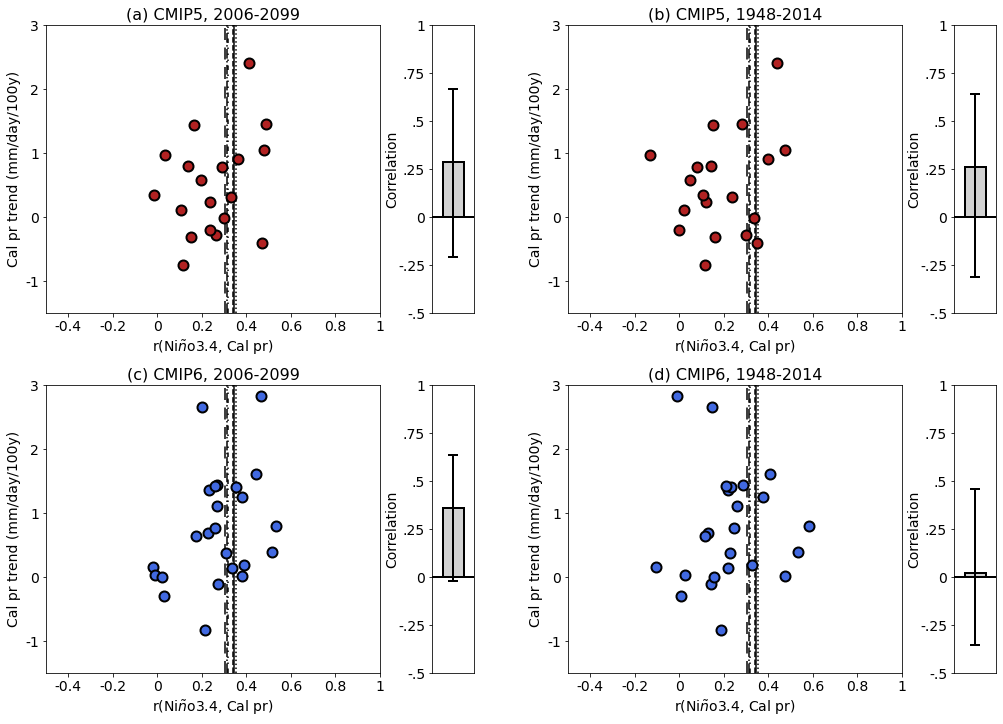

In [8]:
fig = plt.figure()
w=14.5 ; h=10
fig.set_size_inches(w, h)

ax1 = fig.add_axes(np.array([0.05, 0.55, 0.32, 0.4]))
ax1 = ecfig.calpscattersetup(ax1,'(a) CMIP5, 2006-2099')
ax1.vlines(obs_cor["cor"], -1.5, 3, linestyles = obs_linestyles, color = "k", zorder = 0) 
ax1.plot(corf5m, trend5m, "o", markerfacecolor="firebrick", markeredgecolor="black", markersize=10, markeredgewidth=2)

ax2 = fig.add_axes(np.array([0.42, 0.55, 0.04, 0.4]))
ax2.set_xlim(0,2)
ax2.set_ylim(-0.5,1)
ax2.set_yticks([-0.5,-0.25,0,0.25,0.5,0.75,1])
ax2.set_yticklabels(['-.5','-.25','0','.25','.5','.75','1'], fontsize=14)
ax2.set_ylabel('Correlation', fontsize=14, labelpad=-1)
ax2.set_xticks([])
ax2.plot([0,2],[0,0], linewidth=2, color='black')
ax2.bar(1, r5f, width=1, bottom=None, align='center', color='lightgray', edgecolor='black', linewidth=2)
ax2.errorbar(1, r5f, [[r5f-minr5f],[maxr5f-r5f]], color='black', linewidth=2, capsize=5, capthick=2)


ax3 = fig.add_axes(np.array([0.55, 0.55, 0.32, 0.4]))
ax3 = ecfig.calpscattersetup(ax3,'(b) CMIP5, 1948-2014')
ax3.vlines(obs_cor["cor"], -1.5, 3, linestyles = obs_linestyles, color = "k", zorder = 0) 
ax3.plot(corp5m, trend5m, "o", markerfacecolor="firebrick", markeredgecolor="black", markersize=10, markeredgewidth=2)


ax4 = fig.add_axes(np.array([0.92, 0.55, 0.04, 0.4]))
ax4.set_xlim(0,2)
ax4.set_ylim(-0.5,1)
ax4.set_yticks([-0.5,-0.25,0,0.25,0.5,0.75,1])
ax4.set_yticklabels(['-.5','-.25','0','.25','.5','.75','1'], fontsize=14)
ax4.set_ylabel('Correlation', fontsize=14, labelpad=-1)
ax4.set_xticks([])
ax4.plot([0,2],[0,0], linewidth=2, color='black')
ax4.bar(1, r5p, width=1, bottom=None, align='center', color='lightgray', edgecolor='black', linewidth=2)
ax4.errorbar(1, r5p, [[r5p-minr5p],[maxr5p-r5p]], color='black', linewidth=2, capsize=5, capthick=2)



ax5 = fig.add_axes(np.array([0.05, 0.05, 0.32, 0.4]))
ax5 = ecfig.calpscattersetup(ax5,'(c) CMIP6, 2006-2099')
ax5.vlines(obs_cor["cor"], -1.5, 3, linestyles = obs_linestyles, color = "k", zorder = 0) 
ax5.plot(corf6m, trend6m, "o", markerfacecolor="royalblue", markeredgecolor="black", markersize=10, markeredgewidth=2)



ax6 = fig.add_axes(np.array([0.42, 0.05, 0.04, 0.4]))
ax6.set_xlim(0,2)
ax6.set_ylim(-0.5,1)
ax6.set_yticks([-0.5,-0.25,0,0.25,0.5,0.75,1])
ax6.set_yticklabels(['-.5','-.25','0','.25','.5','.75','1'], fontsize=14)
ax6.set_ylabel('Correlation', fontsize=14, labelpad=-1)
ax6.set_xticks([])
ax6.plot([0,2],[0,0], linewidth=2, color='black')
ax6.bar(1, r6f, width=1, bottom=None, align='center', color='lightgray', edgecolor='black', linewidth=2)
ax6.errorbar(1, r6f, [[r6f-minr6f],[maxr6f-r6f]], color='black', linewidth=2, capsize=5, capthick=2)



ax7 = fig.add_axes(np.array([0.55, 0.05, 0.32, 0.4]))
ax7 = ecfig.calpscattersetup(ax7,'(d) CMIP6, 1948-2014')
ax7.vlines(obs_cor["cor"], -1.5, 3, linestyles = obs_linestyles, color = "k", zorder = 0) 
ax7.plot(corp6m, trend6m, "o", markerfacecolor="royalblue", markeredgecolor="black", markersize=10, markeredgewidth=2)


ax8 = fig.add_axes(np.array([0.92, 0.05, 0.04, 0.4]))
ax8.set_xlim(0,2)
ax8.set_ylim(-0.5,1)
ax8.set_yticks([-0.5,-0.25,0,0.25,0.5,0.75,1])
ax8.set_yticklabels(['-.5','-.25','0','.25','.5','.75','1'], fontsize=14)
ax8.set_ylabel('Correlation', fontsize=14, labelpad=-1)
ax8.set_xticks([])
ax8.plot([0,2],[0,0], linewidth=2, color='black')
ax8.bar(1, r6p, width=1, bottom=None, align='center', color='lightgray', edgecolor='black', linewidth=2)
ax8.errorbar(1, r6p, [[r6p-minr6p],[maxr6p-r6p]], color='black', linewidth=2, capsize=5, capthick=2)

fig.savefig('figs6.pdf', facecolor='white', bbox_inches='tight')